In [32]:
# Dependencies and Setup
from census import Census
from us import states
from config import (census_key, gkey)
import us
import gmaps
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sodapy import Socrata
import requests
import json

In [33]:
file='counties.csv'
data_df=pd.read_csv(file,encoding='ISO-8859-1')
data_df

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate
0,1001,Autauga,Alabama,32.539527,-86.644082,6.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,55049.0,93.534505,53099.0,12.165525
1,1003,Baldwin,Alabama,30.727750,-87.722071,1.0,4.0,28.0,NaN,0.0,0.0,1.0,NaN,199510.0,137.138546,51365.0,12.806877
2,1005,Barbour,Alabama,31.868263,-85.387129,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26614.0,28.114060,33956.0,23.427519
3,1007,Bibb,Alabama,32.996421,-87.125115,4.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,22572.0,35.986169,39776.0,15.018607
4,1009,Blount,Alabama,33.982109,-86.567906,5.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,57704.0,89.697955,46212.0,16.361084
5,1011,Bullock,Alabama,32.100305,-85.712655,3.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,10552.0,16.277951,29335.0,25.852919
6,1013,Butler,Alabama,31.753001,-86.680575,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,20280.0,25.333449,34315.0,25.276134
7,1015,Calhoun,Alabama,33.774837,-85.826304,1.0,3.0,34.0,NaN,0.0,0.0,0.0,NaN,115883.0,188.617140,41954.0,19.101162
8,1017,Chambers,Alabama,32.913601,-85.390727,2.0,17.0,101.0,NaN,0.0,0.0,8.0,NaN,34018.0,56.347976,36027.0,20.004115
9,1019,Cherokee,Alabama,34.178060,-85.606390,2.0,5.0,NaN,NaN,0.0,0.0,NaN,NaN,25897.0,47.029486,38925.0,16.171757


In [38]:
file='hospitals.csv'
hospitals_df=pd.read_csv(file,encoding='ISO-8859-1')
hospitals_df

,hospital_name,city,state,county_name,hospital_overall_rating
0,GOODLAND REGIONAL MEDICAL CENTER,GOODLAND,KS,SHERMAN,3
1,MARIA PARHAM MEDICAL CENTER,HENDERSON,NC,VANCE,2
2,ALLEGHANY COUNTY MEMORIAL HOSPITAL,SPARTA,NC,ALLEGHANY,2
3,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,SILVER SPRING,MD,MONTGOMERY,3
4,ADVENTHEALTH LAKE WALES,LAKE WALES,FL,POLK,1
5,NEWARK BETH ISRAEL MEDICAL CENTER,NEWARK,NJ,ESSEX,3
6,HOLY CROSS HOSPITAL,CHICAGO,IL,COOK,2
7,FRANCES MAHON DEACONESS HOSPITAL,GLASGOW,MT,VALLEY,4
8,AIKEN REGIONAL MEDICAL CENTER,AIKEN,SC,AIKEN,2
9,HIGHPOINT HEALTH,LAWRENCEBURG,IN,DEARBORN,4


In [39]:
# Merge county and hospital dataframes on county name
hospitals_df['county_name'] =hospitals_df['county_name'].str.capitalize()
hospitals_df=hospitals_df.groupby(['county_name','state']).mean().reset_index()
State=[]
for row in hospitals_df.itertuples(index=False):
    State.append(us.states.lookup(row.state).name)
hospitals_df['State']=State
hospitals_df=hospitals_df[['State','county_name','hospital_overall_rating']]
hospitals_df= hospitals_df.rename(columns={'hospital_overall_rating': 'Average Hospital',
                                     'county_name':'County'})
merged_df = data_df.merge(hospitals_df, how='inner', left_on=["State", "County"], right_on=["State","County"])

# Take a look at the dataframe
merged_df

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate,Average Hospital
0,1001,Autauga,Alabama,32.539527,-86.644082,6.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,55049.0,93.534505,53099.0,12.165525,5.000000
1,1003,Baldwin,Alabama,30.727750,-87.722071,1.0,4.0,28.0,NaN,0.0,0.0,1.0,NaN,199510.0,137.138546,51365.0,12.806877,3.666667
2,1005,Barbour,Alabama,31.868263,-85.387129,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26614.0,28.114060,33956.0,23.427519,3.000000
3,1007,Bibb,Alabama,32.996421,-87.125115,4.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,22572.0,35.986169,39776.0,15.018607,3.000000
4,1009,Blount,Alabama,33.982109,-86.567906,5.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,57704.0,89.697955,46212.0,16.361084,3.000000
5,1013,Butler,Alabama,31.753001,-86.680575,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,20280.0,25.333449,34315.0,25.276134,2.000000
6,1015,Calhoun,Alabama,33.774837,-85.826304,1.0,3.0,34.0,NaN,0.0,0.0,0.0,NaN,115883.0,188.617140,41954.0,19.101162,2.000000
7,1021,Chilton,Alabama,32.850441,-86.717326,7.0,15.0,NaN,NaN,0.0,0.0,NaN,NaN,43817.0,63.726498,42594.0,20.035603,4.000000
8,1025,Clarke,Alabama,31.680999,-87.835486,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,24847.0,19.314926,32735.0,24.240351,2.000000
9,1027,Clay,Alabama,33.269842,-85.858361,2.0,8.0,NaN,NaN,0.0,0.0,NaN,NaN,13483.0,21.979895,38815.0,16.279760,4.000000


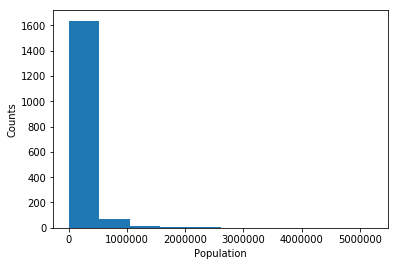

143535.94882116158
46359.0
0      15578.0
1      17137.0
2      19384.0
3      19503.0
4      20324.0
5      25403.0
6      33765.0
7      37050.0
8      43198.0
9      53955.0
10    155817.0
dtype: float64


In [95]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(merged_df['Population'])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(merged_df['Population'].mean())
print(merged_df['Population'].median())
print(merged_df['Population'].mode())

In [96]:
#Summary statistics 
#Determine mean and mode for county level hospital quality
coun_hospital_quality_mean = round(merged_df['Average Hospital'].astype('float').mean(), 2)
coun_hospital_quality_median = round(merged_df['Average Hospital'].astype('float').median(), 2)
coun_hospital_quality_mode = round(merged_df['Average Hospital'].astype('float').mode(), 2)

#mean and mode for hospital quality across all counties
print(f"County Level Hospital Rating Mean: {coun_hospital_quality_mean}")
print(f"County Level Hospital Rating Median: {coun_hospital_quality_median}")
print(f"County Level Hospital Rating mode {coun_hospital_quality_mode}")

County Level Hospital Rating Mean: 3.31
County Level Hospital Rating Median: 3.07
County Level Hospital Rating mode 0    4.0
dtype: float64


In [79]:
#summary statistics for hospital quality for each county 
county_stats_group=merged_df.groupby('County').agg({'Average Hospital': ['mean', 'median', 'var', 'std', 'sem']})
county_stats_group

Average Hospital                                        
                         mean    median       var       std       sem
County                                                               
Abbeville            3.000000  3.000000       NaN       NaN       NaN
Acadia               3.000000  3.000000       NaN       NaN       NaN
Accomack             3.000000  3.000000       NaN       NaN       NaN
Ada                  4.500000  4.500000       NaN       NaN       NaN
Adair                4.500000  4.500000  0.500000  0.707107  0.500000
Adams                3.407407  4.000000  0.743827  0.862454  0.287485
Addison              4.000000  4.000000       NaN       NaN       NaN
Aiken                2.000000  2.000000       NaN       NaN       NaN
Aitkin               5.000000  5.000000       NaN       NaN       NaN
Alachua              2.000000  2.000000       NaN       NaN       NaN
Alamance             3.000000  3.000000       NaN       NaN       NaN
Alameda              3.181818  3.181818       NaN       NaN       NaN
Alamosa              4.000000  4.000000       NaN       NaN       NaN
Albany               2.333333  2.333333  0.888889  0.942809  0.666667
Albemarle            5.000000  5.000000       NaN       NaN       NaN
Alcorn               2.000000  2.000000       NaN       NaN       NaN
Allegan              3.000000  3.000000       NaN       NaN       NaN
Allegany             1.500000  1.500000  0.500000  0.707107  0.500000
Alleghany            3.000000  3.000000  2.000000  1.414214  1.000000
Allegheny            3.066667  3.066667       NaN       NaN       NaN
Allen                2.437500  2.375000  0.265625  0.515388  0.257694
Alpena               2.000000  2.000000       NaN       NaN       NaN
Amador               4.000000  4.000000       NaN       NaN       NaN
Anchorage            3.333333  3.333333       NaN       NaN       NaN
Anderson             2.000000  2.000000  1.000000  1.000000  0.577350
Andrews              3.000000  3.000000       NaN       NaN       NaN
Androscoggin         2.500000  2.500000       NaN       NaN       NaN
Angelina             3.500000  3.500000       NaN       NaN       NaN
Anoka                4.000000  4.000000       NaN       NaN       NaN
Apache               3.500000  3.500000       NaN       NaN       NaN
...                       ...       ...       ...       ...       ...
Winn                 2.000000  2.000000       NaN       NaN       NaN
Winnebago            3.166667  3.166667  1.388889  1.178511  0.833333
Winneshiek           4.000000  4.000000       NaN       NaN       NaN
Winona               4.000000  4.000000       NaN       NaN       NaN
Winston              5.000000  5.000000       NaN       NaN       NaN
Wise                 2.500000  2.500000  0.500000  0.707107  0.500000
Wood                 3.250000  3.000000  1.583333  1.258306  0.629153
Woodbury             1.500000  1.500000       NaN       NaN       NaN
Woodford             3.000000  3.000000       NaN       NaN       NaN
Woodward             4.000000  4.000000       NaN       NaN       NaN
Worcester            3.285714  3.285714  1.020408  1.010153  0.714286
Wright               4.750000  4.750000  0.125000  0.353553  0.250000
Wyandot              3.000000  3.000000       NaN       NaN       NaN
Wyandotte            4.500000  4.500000       NaN       NaN       NaN
Wyoming              4.000000  4.000000  2.000000  1.414214  1.000000
Wythe                3.000000  3.000000       NaN       NaN       NaN
Yakima               3.000000  3.000000       NaN       NaN       NaN
Yalobusha            3.000000  3.000000       NaN       NaN       NaN
Yamhill              4.000000  4.000000       NaN       NaN       NaN
Yankton              5.000000  5.000000       NaN       NaN       NaN
Yates                3.000000  3.000000       NaN       NaN       NaN
Yavapai              4.000000  4.000000       NaN       NaN       NaN
Yazoo                4.000000  4.000000       NaN       NaN       NaN
Yell                 2.

In [83]:
#lowest and highest case rate at day 5 across all counties 
print(f"The minimum day 5 case rate across all counties is {merged_df['confirm_5'].min()}")
print(f"The maximum day 5 case rate across all counties is {merged_df['confirm_5'].max()}")

The minimum day 5 case rate across all counties is 0.0
The maximum day 5 case rate across all counties is 83.0


In [84]:
#lowest and highest case rate at day 10 across all counties 
print(f"The minimum day 10 case rate across all counties is {merged_df['confirm_10'].min()}")
print(f"The maximum day 10 case rate across all counties is {merged_df['confirm_10'].max()}")

The minimum day 10 case rate across all counties is 0.0
The maximum day 10 case rate across all counties is 326.0


In [85]:
#lowest and highest case rate at day 20 across all counties 
print(f"The minimum day 20 case rate across all counties is {merged_df['confirm_20'].min()}")
print(f"The maximum day 20 case rate across all counties is {merged_df['confirm_20'].max()}")

The minimum day 20 case rate across all counties is 0.0
The maximum day 20 case rate across all counties is 3385.0


In [86]:
#lowest and highest case rate at day 50 across all counties 
print(f"The minimum day 50 case rate across all counties is {merged_df['confirm_50'].min()}")
print(f"The maximum day 50 case rate across all counties is {merged_df['confirm_50'].max()}")

The minimum day 50 case rate across all counties is 4.0
The maximum day 50 case rate across all counties is 190.0


In [87]:
#lowest and highest death rate at day 5 across all counties 
print(f"The minimum day 5 death rate across all counties is {merged_df['death_5'].min()}")
print(f"The maximum day 5 death rate across all counties is {merged_df['death_5'].max()}")

The minimum day 5 death rate across all counties is 0.0
The maximum day 5 death rate across all counties is 3.0


In [88]:
#lowest and highest death rate at day 10 across all counties 
print(f"The minimum day 10 death rate across all counties is {merged_df['death_10'].min()}")
print(f"The maximum day 10 death rate across all counties is {merged_df['death_10'].max()}")

The minimum day 10 death rate across all counties is 0.0
The maximum day 10 death rate across all counties is 10.0


In [89]:
#lowest and highest case rate at day 20 across all counties 
print(f"The minimum day 20 death rate across all counties is {merged_df['death_20'].min()}")
print(f"The maximum day 20 death rate across all counties is {merged_df['death_20'].max()}")

The minimum day 20 death rate across all counties is 0.0
The maximum day 20 death rate across all counties is 86.0


In [90]:
#lowest and highest death rate at day 50 across all counties 
print(f"The minimum day 50 death rate across all counties is {merged_df['death_50'].min()}")
print(f"The maximum day 50 death rate across all counties is {merged_df['death_50'].max()}")

The minimum day 50 death rate across all counties is 0.0
The maximum day 50 death rate across all counties is 22.0


In [91]:
#lowest and highest population across all counties
print(f"The minimum population across all counties is {merged_df['Population'].min()}")
print(f"The maximum population across all counties is {merged_df['Population'].max()}")

The minimum population across all counties is 2348.0
The maximum population across all counties is 5227575.0


In [82]:
#lowest and highest median income across all counties (in $1000s) observed
print(f"The minimum median income across all counties is {merged_df['Median Household Income'].min()}")
print(f"The maximum median income across all counties is {merged_df['Median Household Income'].max()}")

The minimum median income across all counties is 22174.0
The maximum median income across all counties is 125672.0


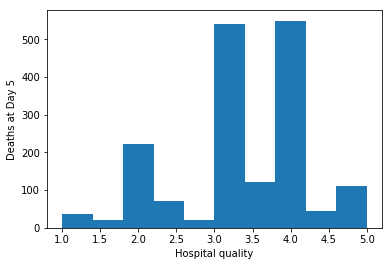

NormaltestResult(statistic=1.8561924556689235, pvalue=0.395305566197231)


In [92]:
# Determine if the hospital quality is normally distributed
plt.hist(merged_df['Average Hospital'])
plt.xlabel('Hospital quality')
plt.ylabel('Deaths at Day 5')
plt.show()
print(st.normaltest(merged_df["Average Hospital"].sample(100)))

R squared: nan


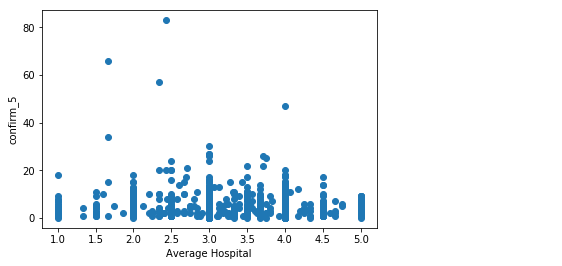

In [50]:
# Convert to floats and store County level hospital rating and cases at Day 5
x_values = merged_df['Average Hospital'].astype('float')
y_values = merged_df['confirm_5'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Average Hospital')
plt.ylabel('confirm_5')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

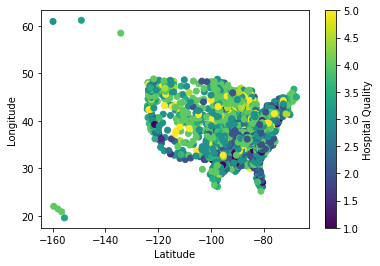

In [100]:
#plot the latitude and longitude of hospital quality using Matplotlib, color the data points using the hospital quality of the block.
plt.scatter(merged_df['Longitude'], merged_df['Latitude'], c=merged_df['Average Hospital'])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
clb.set_label("Hospital Quality")
plt.show()

In [124]:
#Create Heat maps 
#Configure gmaps with API key
gmaps.configure(api_key=gkey)

#Removing NAN values
merged_data_complete_df = merged_df.dropna()
# Store Latitude and Longitude into  locations 
locations = merged_data_complete_df[['Latitude', 'Longitude']]

In [125]:
# Convert Poverty Rate to float and store (removing NAN values)

census_data_complete = data_df.dropna()
poverty_rate = census_data_complete["Poverty Rate"].astype(float)

In [128]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_map = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_map)
fig


Figure(layout=FigureLayout(height='420px'))

In [129]:
# Convert day 5 case rate to list
day5_case_rate = census_data_complete["confirm_5"].tolist()

In [147]:
day5_case_rate
template="<dl><dd>confirm_5: {confirm_5}</dd></dl>"
infodata=[template.format(**row) for index,row in census_data_complete.iterrows()] 
infodata

['<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>']

In [148]:
# Create day 5 case rate symbol layer
template="<dl><dd>confirm_5: {confirm_5}</dd></dl>"
infodata=[template.format(**row) for index,row in census_data_complete.iterrows()] 
day5_case_layer = gmaps.symbol_layer(
    locations, #fill_color='rgba(0, 150, 0, 0.4)',
    #stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=infodata
    #info_box_content="<dl><dd>confirm_5: 10</dd></dl>"
)

fig = gmaps.figure()
fig.add_layer(day5_case_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [150]:
# Create a combined map
fig = gmaps.figure()
fig.add_layer(heat_map)
fig.add_layer(day5_case_layer)
fig


Figure(layout=FigureLayout(height='420px'))